## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

import joblib

### Menyiapkan data yang akan digunakan

In [2]:
pd.options.display.max_columns = None
path = "Students_Performance_data_set.xlsx"
base_df = pd.read_excel(path)
data_df = base_df.copy()
data_df.head()

,University Admission year,Gender,Age,H.S.C passing year,Program,Current Semester,Do you have meritorious scholarship ?,Do you use University transportation?,How many hour do you study daily?,How many times do you seat for study in a day?,What is your preferable learning mode?,Do you use smart phone?,Do you have personal Computer?,How many hour do you spent daily in social media?,Status of your English language proficiency,Average attendance on class,Did you ever fall in probation?,Did you ever got suspension?,Do you attend in teacher consultancy for any kind of academical problems?,What are the skills do you have ?,How many hour do you spent daily on your skill development?,What is you interested area?,What is your relationship status?,Are you engaged with any co-curriculum activities?,With whom you are living with?,Do you have any health issues?,What was your previous SGPA?,Do you have any physical disabilities?,What is your current CGPA?,How many Credit did you have completed?,What is your monthly family income?
0,2018,Male,24,2016,BCSE,12,Yes,No,3,2,Offline,Yes,Yes,5,Intermediate,90,No,No,Yes,Software Development,2,Data Schince,Single,Yes,Bachelor,No,2.68,No,3.15,75,25000
1,2021,Male,22,2020,BCSE,4,Yes,Yes,3,2,Online,Yes,Yes,3,Basic,96,Yes,No,No,Web development,2,Event management,Single,Yes,Family,No,2.68,No,3.15,36,100000
2,2020,Female,21,2019,BCSE,5,No,No,3,3,Offline,Yes,Yes,3,Intermediate,80,No,No,Yes,Programming,1,Software,Single,No,Bachelor,No,2.68,No,3.15,50,50000
3,2021,Male,20,2020,BCSE,4,Yes,No,1,3,Offline,Yes,Yes,2,Intermediate,88,No,No,Yes,Programming,1,Artificial Intelligence,Single,No,Bachelor,Yes,2.68,No,3.15,36,62488
4,2021,Male,22,2019,BCSE,4,Yes,No,3,1,Online,Yes,Yes,2,Intermediate,80,No,No,Yes,Programming,1,Software,Relationship,No,Bachelor,Yes,2.68,No,3.15,36,50000


## Data Understanding

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 31 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   University Admission year                                                  1194 non-null   int64  
 1   Gender                                                                     1194 non-null   object 
 2   Age                                                                        1194 non-null   int64  
 3   H.S.C passing year                                                         1194 non-null   int64  
 4   Program                                                                    1194 non-null   object 
 5   Current Semester                                                           1194 non-null   int64  
 6   Do you have meritorious scholarship ?                   

In [4]:
data_df.describe(include="all")

,University Admission year,Gender,Age,H.S.C passing year,Program,Current Semester,Do you have meritorious scholarship ?,Do you use University transportation?,How many hour do you study daily?,How many times do you seat for study in a day?,What is your preferable learning mode?,Do you use smart phone?,Do you have personal Computer?,How many hour do you spent daily in social media?,Status of your English language proficiency,Average attendance on class,Did you ever fall in probation?,Did you ever got suspension?,Do you attend in teacher consultancy for any kind of academical problems?,What are the skills do you have ?,How many hour do you spent daily on your skill development?,What is you interested area?,What is your relationship status?,Are you engaged with any co-curriculum activities?,With whom you are living with?,Do you have any health issues?,What was your previous SGPA?,Do you have any physical disabilities?,What is your current CGPA?,How many Credit did you have completed?,What is your monthly family income?
count,1194.000000,1194,1194.000000,1194.000000,1194,1194.000000,1194,1194,1194.000000,1194.000000,1194,1194,1194,1194.000000,1194,1194.0,1194,1194,1194,1193,1194.000000,1194,1194,1194,1194,1194,1194.000000,1194,1194.000000,1194.000000,1.194000e+03
unique,NaN,2,NaN,NaN,1,NaN,2,2,NaN,NaN,2,2,2,NaN,3,66.0,2,2,2,55,NaN,25,5,2,2,4,NaN,2,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,BCSE,NaN,No,No,NaN,NaN,Offline,Yes,Yes,NaN,Intermediate,100.0,No,No,Yes,Programming,NaN,Software,Single,No,Family,No,NaN,No,NaN,NaN,NaN
freq,NaN,672,NaN,NaN,1194,NaN,671,697,NaN,NaN,858,1178,1095,NaN,670,357.0,896,1148,659,533,NaN,648,896,689,642,983,NaN,1167,NaN,NaN,NaN
mean,2020.515075,NaN,21.343384,2019.214405,NaN,6.539363,NaN,NaN,3.131491,1.940536,NaN,NaN,NaN,3.289782,NaN,NaN,NaN,NaN,NaN,NaN,2.185092,NaN,NaN,NaN,NaN,NaN,2.683946,NaN,3.165600,71.842546,6.248812e+04
std,1.354954,NaN,1.613338,1.380960,NaN,3.809884,NaN,NaN,1.649597,0.856305,NaN,NaN,NaN,2.289547,NaN,NaN,NaN,NaN,NaN,NaN,1.296101,NaN,NaN,NaN,NaN,NaN,0.871589,NaN,0.750127,48.074338,7.617356e+04
min,2013.000000,NaN,18.000000,2012.000000,NaN,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,4.000000e+03
25%,2020.000000,NaN,20.000000,2019.000000,NaN,3.000000,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,2.200000,NaN,2.900000,23.000000,3.000000e+04
50%,2021.000000,NaN,21.000000,2020.000000,NaN,7.000000,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,2.680000,NaN,3.210000,78.000000,5.000000e+04
75%,2022.000000,NaN,22.000000,2020.000000,NaN,10.000000,NaN,NaN,4.000000,2.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,3.380000,NaN,3.670000,117.000000,7.400000e+04


In [5]:
data_df.isna().sum()

University Admission year                                                    0
Gender                                                                       0
Age                                                                          0
H.S.C passing year                                                           0
Program                                                                      0
Current Semester                                                             0
Do you have meritorious scholarship ?                                        0
Do you use University transportation?                                        0
How many hour do you study daily?                                            0
How many times do you seat for study in a day?                               0
What is your preferable learning mode?                                       0
Do you use smart phone?                                                      0
Do you have personal Computer?                      

In [6]:
data_df.duplicated().sum()

0

In [7]:
data_df.dropna(inplace=True)

In [8]:
# Buat dictionary mapping kolom lama ke kolom baru
rename_columns = {
    'University Admission year': 'admission_year',
    'Gender': 'gender',
    'Age': 'age',
    'H.S.C passing year': 'hsc_passing_year',
    'Program': 'program',
    'Current Semester': 'current_semester',
    'Do you have meritorious scholarship ?': 'meritorious_scholarship',
    'Do you use University transportation?': 'use_university_transportation',
    'How many hour do you study daily?': 'daily_study_hours',
    'How many times do you seat for study in a day?': 'daily_study_sessions',
    'What is your preferable learning mode?': 'preferable_learning_mode',
    'Do you use smart phone?': 'use_smartphone',
    'Do you have personal Computer?': 'have_personal_computer',
    'How many hour do you spent daily in social media?': 'daily_social_media_hours',
    'Status of your English language proficiency': 'english_proficiency_status',
    'Average attendance on class': 'average_class_attendance',
    'Did you ever fall in probation?': 'ever_in_probation',
    'Did you ever got suspension?': 'ever_suspended',
    'Do you attend in teacher consultancy for any kind of academical problems?': 'attend_teacher_consultancy',
    'What are the skills do you have ?': 'skills',
    'How many hour do you spent daily on your skill development?': 'daily_skill_dev_hours',
    'What is you interested area?': 'interested_area',
    'What is your relationship status?': 'relationship_status',
    'Are you engaged with any co-curriculum activities?': 'co_curriculum_activities',
    'With whom you are living with?': 'living_with',
    'Do you have any health issues?': 'have_health_issues',
    'What was your previous SGPA?': 'previous_sgpa',
    'Do you have any physical disabilities?': 'have_physical_disabilities',
    'What is your current CGPA?': 'current_cgpa',
    'How many Credit did you have completed?': 'completed_credits',
    'What is your monthly family income?': 'monthly_family_income'
}

# Ganti nama kolom di DataFrame
data_df.rename(columns=rename_columns, inplace=True)

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1193 entries, 0 to 1193
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   admission_year                 1193 non-null   int64  
 1   gender                         1193 non-null   object 
 2   age                            1193 non-null   int64  
 3   hsc_passing_year               1193 non-null   int64  
 4   program                        1193 non-null   object 
 5   current_semester               1193 non-null   int64  
 6   meritorious_scholarship        1193 non-null   object 
 7   use_university_transportation  1193 non-null   object 
 8   daily_study_hours              1193 non-null   int64  
 9   daily_study_sessions           1193 non-null   int64  
 10  preferable_learning_mode       1193 non-null   object 
 11  use_smartphone                 1193 non-null   object 
 12  have_personal_computer         1193 non-null   object

In [10]:
data_df.head()

,admission_year,gender,age,hsc_passing_year,program,current_semester,meritorious_scholarship,use_university_transportation,daily_study_hours,daily_study_sessions,preferable_learning_mode,use_smartphone,have_personal_computer,daily_social_media_hours,english_proficiency_status,average_class_attendance,ever_in_probation,ever_suspended,attend_teacher_consultancy,skills,daily_skill_dev_hours,interested_area,relationship_status,co_curriculum_activities,living_with,have_health_issues,previous_sgpa,have_physical_disabilities,current_cgpa,completed_credits,monthly_family_income
0,2018,Male,24,2016,BCSE,12,Yes,No,3,2,Offline,Yes,Yes,5,Intermediate,90,No,No,Yes,Software Development,2,Data Schince,Single,Yes,Bachelor,No,2.68,No,3.15,75,25000
1,2021,Male,22,2020,BCSE,4,Yes,Yes,3,2,Online,Yes,Yes,3,Basic,96,Yes,No,No,Web development,2,Event management,Single,Yes,Family,No,2.68,No,3.15,36,100000
2,2020,Female,21,2019,BCSE,5,No,No,3,3,Offline,Yes,Yes,3,Intermediate,80,No,No,Yes,Programming,1,Software,Single,No,Bachelor,No,2.68,No,3.15,50,50000
3,2021,Male,20,2020,BCSE,4,Yes,No,1,3,Offline,Yes,Yes,2,Intermediate,88,No,No,Yes,Programming,1,Artificial Intelligence,Single,No,Bachelor,Yes,2.68,No,3.15,36,62488
4,2021,Male,22,2019,BCSE,4,Yes,No,3,1,Online,Yes,Yes,2,Intermediate,80,No,No,Yes,Programming,1,Software,Relationship,No,Bachelor,Yes,2.68,No,3.15,36,50000


In [11]:
cat_data = data_df.select_dtypes(include='object')
num_data  = data_df.select_dtypes(exclude='object')
print(f"Categorical Columns = {cat_data.columns}")
print(f"Numerical Columns = {num_data.columns}")

Categorical Columns = Index(['gender', 'program', 'meritorious_scholarship',
       'use_university_transportation', 'preferable_learning_mode',
       'use_smartphone', 'have_personal_computer',
       'english_proficiency_status', 'average_class_attendance',
       'ever_in_probation', 'ever_suspended', 'attend_teacher_consultancy',
       'skills', 'interested_area', 'relationship_status',
       'co_curriculum_activities', 'living_with', 'have_health_issues',
       'have_physical_disabilities'],
      dtype='object')
Numerical Columns = Index(['admission_year', 'age', 'hsc_passing_year', 'current_semester',
       'daily_study_hours', 'daily_study_sessions', 'daily_social_media_hours',
       'daily_skill_dev_hours', 'previous_sgpa', 'current_cgpa',
       'completed_credits', 'monthly_family_income'],
      dtype='object')


In [12]:
for col in data_df.columns:
    print(f"\nValue counts for '{col}':")
    print(data_df[col].value_counts(sort=0))



Value counts for 'admission_year':
admission_year
2018     49
2021    328
2020    283
2022    323
2019    179
2017     12
2015      5
2016      4
2014      3
2013      1
2023      6
Name: count, dtype: int64

Value counts for 'gender':
gender
Male      671
Female    522
Name: count, dtype: int64

Value counts for 'age':
age
24     69
22    213
21    295
20    352
19     80
25     58
23    109
26     12
27      1
18      4
Name: count, dtype: int64

Value counts for 'hsc_passing_year':
hsc_passing_year
2016     28
2020    480
2019    302
2018    171
2021    115
2017     67
2022      9
2012      2
2014     10
2015      5
2028      1
2013      3
Name: count, dtype: int64

Value counts for 'program':
program
BCSE    1193
Name: count, dtype: int64

Value counts for 'current_semester':
current_semester
12     21
4      77
5      65
2     211
11    166
8     149
10     90
13      9
9      98
15      5
14     12
21      1
6      56
7      64
22      3
1      61
18      1
17      2
3      99
1

In [13]:
data_df['have_health_issues'] = data_df['have_health_issues'].str.lower()  # ubah ke huruf kecil

data_df['have_health_issues'] = data_df['have_health_issues'].replace({
    'no': 'No',
    'n': 'No',
    'yes': 'Yes',
    'y': 'Yes'
})


def categorize_interest(area):
    if not isinstance(area, str):
        area = str(area).lower()
    else:
        area = area.lower()

    if 'data' in area and 'science' in area:
        return 'Data Science'
    elif 'machine learning' in area or 'artificial intelligence' in area:
        return 'AI/ML'
    elif 'software' in area or 'programming' in area or 'competitive' in area or 'creating a game' in area:
        return 'Software Development'
    elif 'network' in area:
        return 'Networking'
    elif 'cyber' in area or 'syber' in area:
        return 'Cybersecurity'
    elif 'web' in area or 'full stack' in area:
        return 'Web Development'
    elif 'ui/ux' in area:
        return 'UI/UX'
    elif 'teach' in area:
        return 'Teaching'
    elif 'event' in area or 'entrepreneur' in area or 'blockchain' in area:
        return 'Other Interests'
    elif 'confuse' in area:
        return 'Undecided'
    else:
        return 'Others'

data_df['interested_area'] = data_df['interested_area'].apply(categorize_interest)

def clean_skills(val):
    if not isinstance(val, str):
        return 'Uncertain'
    val = val.lower()

    if 'programming' in val or 'python' in val:
        return 'Programming'
    elif 'web' in val:
        return 'Web Development'
    elif 'networking' in val:
        return 'Networking'
    elif 'artificial intelligence' in val or 'machine learning' in val:
        return 'AI/ML'
    elif 'software development' in val or 'app development' in val:
        return 'Software Development'
    elif any(x in val for x in ['graphics', 'design', 'video', 'photo', 'content', 'digital marketing', 'e-commerce']):
        return 'Creative/Design'
    elif any(x in val for x in ['nothing', 'not', 'no skill', 'haven\'t', 'don\'t have', 'i do not know']):
        return 'No Skills'
    else:
        return 'Others'

data_df['skills'] = data_df['skills'].apply(clean_skills)

data_df['relationship_status'] = data_df['relationship_status'].replace({
    'In a relationship' : 'Relationship'
})

data_df['average_class_attendance'] = pd.to_numeric(data_df['average_class_attendance'], errors='coerce')


In [14]:
for col in data_df.columns:
    print(f"\nValue counts for '{col}':")
    print(data_df[col].value_counts(sort=0))



Value counts for 'admission_year':
admission_year
2018     49
2021    328
2020    283
2022    323
2019    179
2017     12
2015      5
2016      4
2014      3
2013      1
2023      6
Name: count, dtype: int64

Value counts for 'gender':
gender
Male      671
Female    522
Name: count, dtype: int64

Value counts for 'age':
age
24     69
22    213
21    295
20    352
19     80
25     58
23    109
26     12
27      1
18      4
Name: count, dtype: int64

Value counts for 'hsc_passing_year':
hsc_passing_year
2016     28
2020    480
2019    302
2018    171
2021    115
2017     67
2022      9
2012      2
2014     10
2015      5
2028      1
2013      3
Name: count, dtype: int64

Value counts for 'program':
program
BCSE    1193
Name: count, dtype: int64

Value counts for 'current_semester':
current_semester
12     21
4      77
5      65
2     211
11    166
8     149
10     90
13      9
9      98
15      5
14     12
21      1
6      56
7      64
22      3
1      61
18      1
17      2
3      99
1

In [15]:
def get_dropout_status(row):
    if row['current_cgpa'] < 2.0 or row['previous_sgpa'] < 2.0:
        return "At Risk"
    elif row['ever_in_probation'] == "Yes" or row['ever_suspended'] == "Yes":
        return "At Risk"
    elif row['average_class_attendance'] < 50:
        return "At Risk"
    elif row['daily_study_hours'] <= 1 and row['daily_skill_dev_hours'] <= 1:
        return "At Risk"
    else:
        return "Not Likely Dropout"

data_df['dropout_status'] = data_df.apply(get_dropout_status, axis=1)

In [16]:
cat_data = data_df.select_dtypes(include='object')
num_data  = data_df.select_dtypes(exclude='object')
print(f"Categorical Columns = {cat_data.columns}")
print(f"Numerical Columns = {num_data.columns}")

Categorical Columns = Index(['gender', 'program', 'meritorious_scholarship',
       'use_university_transportation', 'preferable_learning_mode',
       'use_smartphone', 'have_personal_computer',
       'english_proficiency_status', 'ever_in_probation', 'ever_suspended',
       'attend_teacher_consultancy', 'skills', 'interested_area',
       'relationship_status', 'co_curriculum_activities', 'living_with',
       'have_health_issues', 'have_physical_disabilities', 'dropout_status'],
      dtype='object')
Numerical Columns = Index(['admission_year', 'age', 'hsc_passing_year', 'current_semester',
       'daily_study_hours', 'daily_study_sessions', 'daily_social_media_hours',
       'average_class_attendance', 'daily_skill_dev_hours', 'previous_sgpa',
       'current_cgpa', 'completed_credits', 'monthly_family_income'],
      dtype='object')


In [17]:
data_df.isna().sum()

admission_year                   0
gender                           0
age                              0
hsc_passing_year                 0
program                          0
current_semester                 0
meritorious_scholarship          0
use_university_transportation    0
daily_study_hours                0
daily_study_sessions             0
preferable_learning_mode         0
use_smartphone                   0
have_personal_computer           0
daily_social_media_hours         0
english_proficiency_status       0
average_class_attendance         1
ever_in_probation                0
ever_suspended                   0
attend_teacher_consultancy       0
skills                           0
daily_skill_dev_hours            0
interested_area                  0
relationship_status              0
co_curriculum_activities         0
living_with                      0
have_health_issues               0
previous_sgpa                    0
have_physical_disabilities       0
current_cgpa        

In [18]:
data_df.dropna(inplace=True)

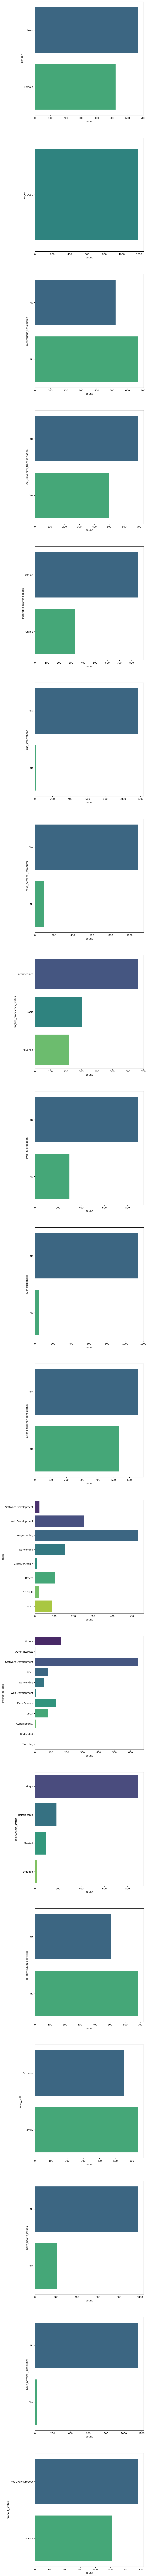

In [19]:
categorical = [col for col in cat_data]

fig, ax = plt.subplots(len(categorical), 1, figsize=(8, len(categorical)*10))

for i, feature in enumerate(categorical):
    sns.countplot(data=data_df, y=feature, hue=feature, palette='viridis', ax=ax[i])


plt.show()

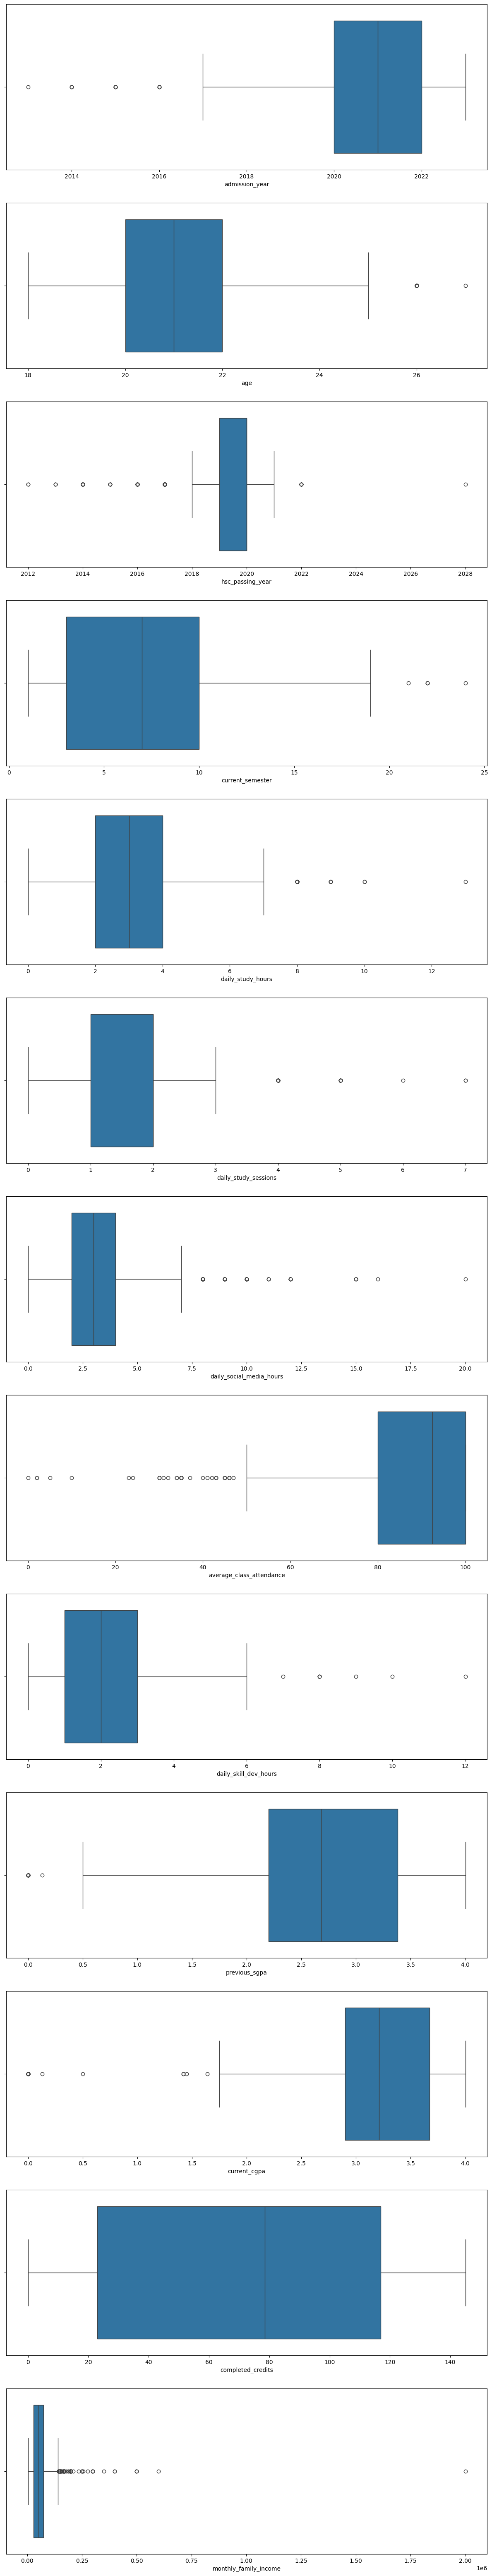

In [20]:
numerical = [col for col in num_data]

fig, ax = plt.subplots(len(numerical), 1, figsize=(15, 80))

for i, feature in enumerate(numerical):
    sns.boxplot(data=data_df, x=feature, ax=ax[i], showfliers=True)


plt.show()

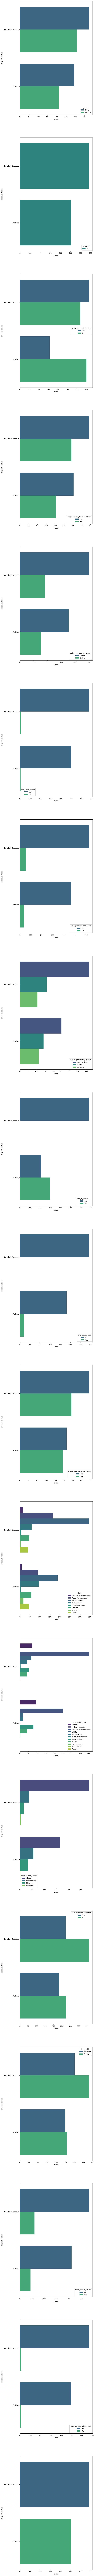

In [21]:
categorical = [col for col in cat_data]

fig, ax = plt.subplots(len(categorical), 1, figsize=(8, len(categorical)*15))

for i, feature in enumerate(categorical):
    sns.countplot(data=data_df, y="dropout_status", hue=feature, palette='viridis', ax=ax[i])


plt.show()

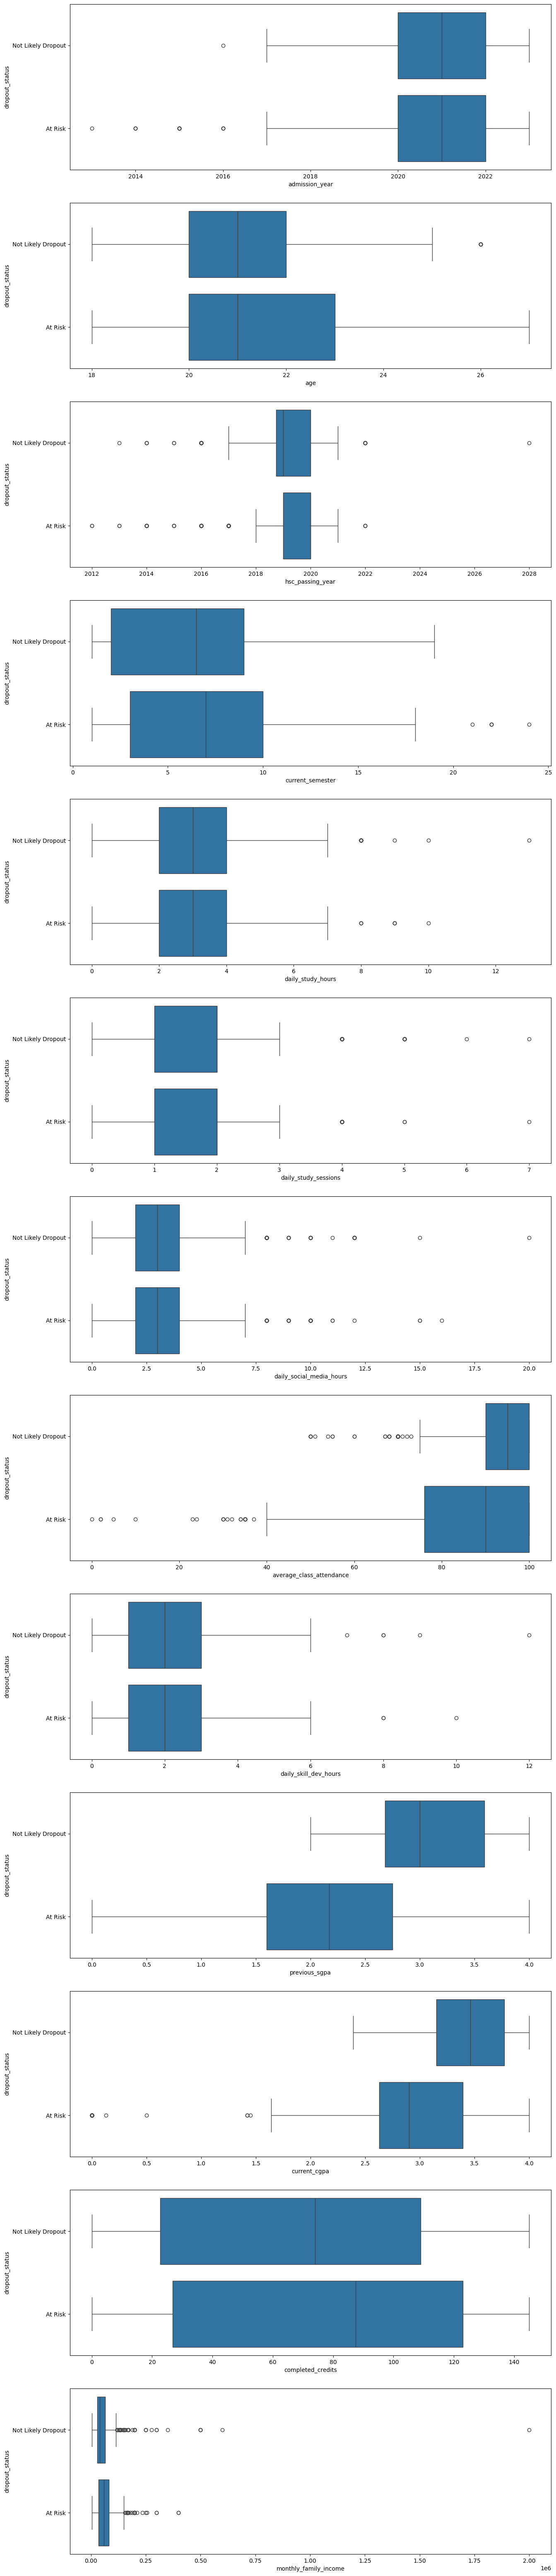

In [22]:
numerical = [col for col in num_data]

fig, ax = plt.subplots(len(numerical), 1, figsize=(15, 80))

for i, feature in enumerate(numerical):
    sns.boxplot(data=data_df, x=feature, y="dropout_status", ax=ax[i], showfliers=True)


plt.show()

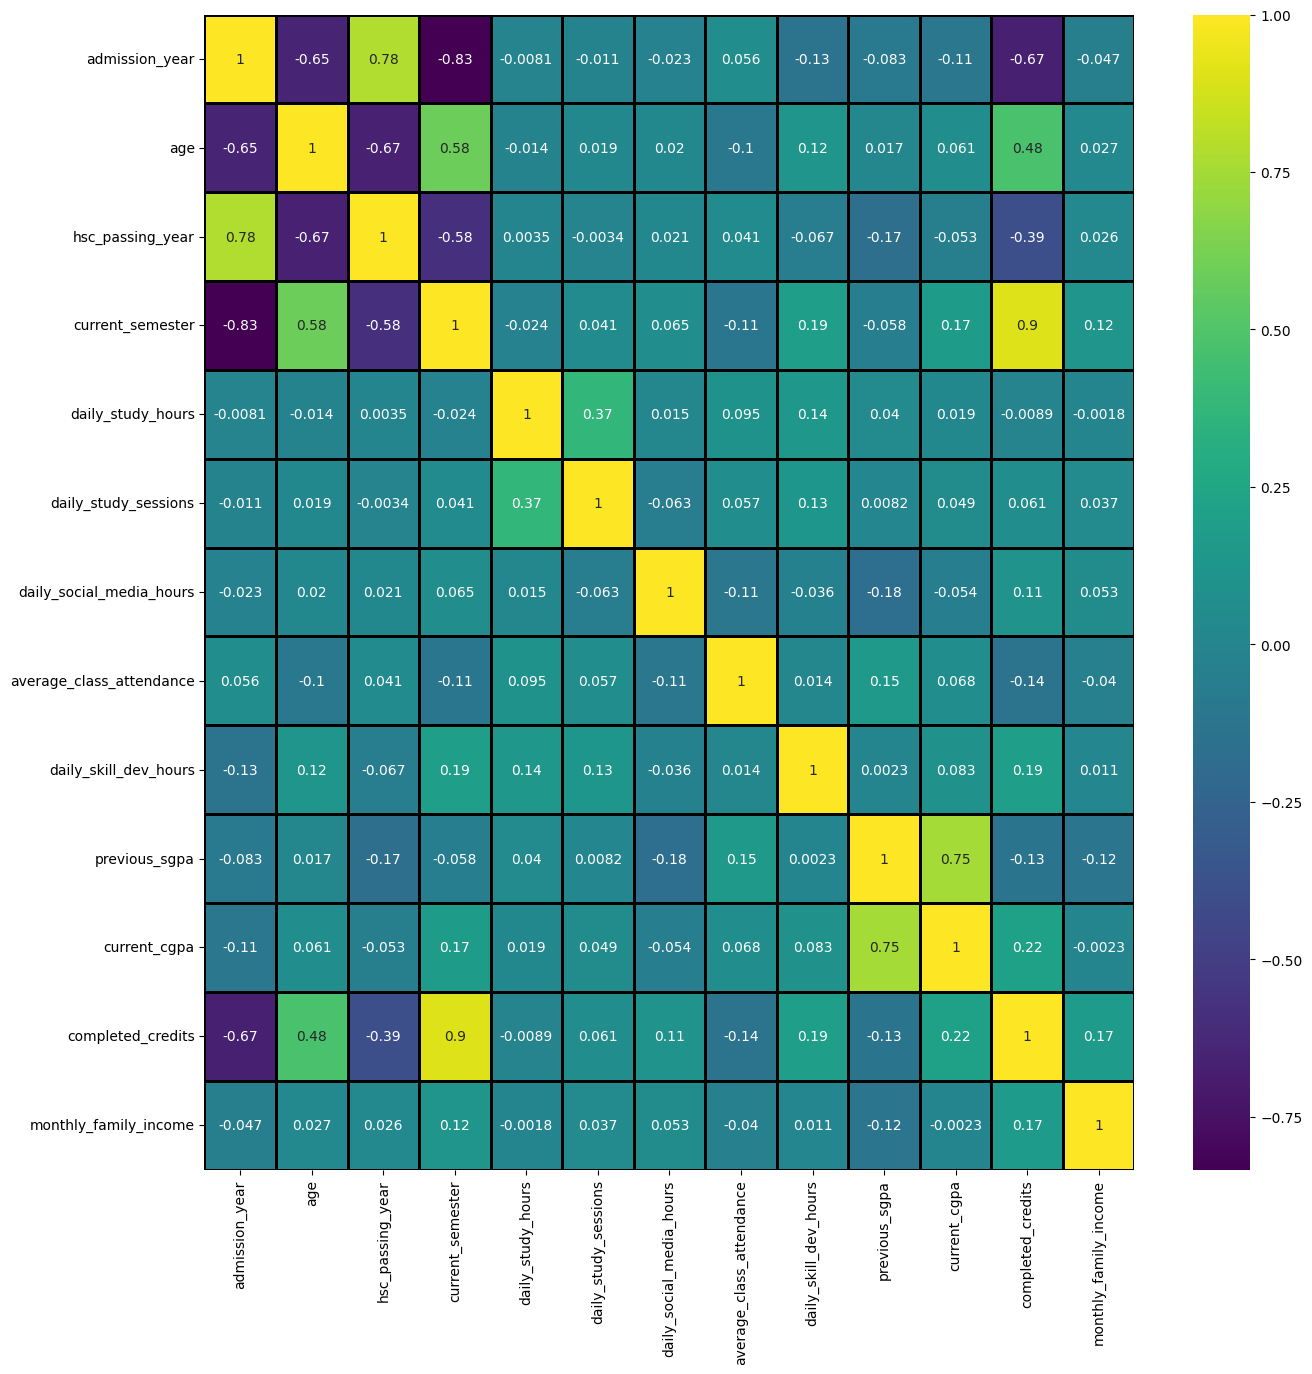

In [23]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_df[numerical].corr(), annot=True, cmap="viridis", linecolor="black", linewidth=1)
plt.show()

In [24]:
# Menyalin data_df ke spearman_corr_df untuk melihat correlasi spearman
spearman_corr_df = data_df.copy()

In [25]:
# melakukan modifikasi dataframe untuk melihat correlasi spearman

spearman_corr_df = spearman_corr_df.drop(columns=['program'])

categorical_columns = ['admission_year', 'gender', 'hsc_passing_year', 'program', 'current_semester',
                       'meritorious_scholarship', 'use_university_transportation', 'preferable_learning_mode',
                       'use_smartphone', 'have_personal_computer', 'english_proficiency_status',
                       'ever_in_probation', 'ever_suspended', 'attend_teacher_consultancy', 'skills',
                       'interested_area', 'relationship_status', 'co_curriculum_activities', 'living_with',
                       'have_health_issues', 'have_physical_disabilities']

categorical_mappings = {
    'gender': {'Male': 0, 'Female': 1},
    'meritorious_scholarship': {'Yes': 1, 'No': 0},
    'use_university_transportation': {'Yes': 1, 'No': 0},
    'preferable_learning_mode': {'Offline': 0, 'Online': 1},
    'use_smartphone': {'Yes': 1, 'No': 0},
    'have_personal_computer': {'Yes': 1, 'No': 0},
    'english_proficiency_status': {'Basic': 0, 'Intermediate': 1, 'Advance': 2},
    'ever_in_probation': {'Yes': 1, 'No': 0},
    'ever_suspended': {'Yes': 1, 'No': 0},
    'attend_teacher_consultancy': {'Yes': 1, 'No': 0},
    'co_curriculum_activities': {'Yes': 1, 'No': 0},
    'living_with': {'Bachelor': 0, 'Family': 1},
    'have_health_issues': {'Yes': 1, 'No': 0},
    'have_physical_disabilities': {'Yes': 1, 'No': 0},
    'dropout_status' : {"At Risk": 0, "Not Likely Dropout": 1}
}

for col, mapping in categorical_mappings.items():
    if col in spearman_corr_df.columns:
        spearman_corr_df[col] = spearman_corr_df[col].map(mapping)

spearman_corr_df['admission_year'] = spearman_corr_df['admission_year'].astype('category').cat.codes
spearman_corr_df['hsc_passing_year'] = spearman_corr_df['hsc_passing_year'].astype('category').cat.codes
spearman_corr_df['current_semester'] = spearman_corr_df['current_semester'].astype('category').cat.codes
spearman_corr_df['skills'] = spearman_corr_df['skills'].astype('category').cat.codes
spearman_corr_df['interested_area'] = spearman_corr_df['interested_area'].astype('category').cat.codes
spearman_corr_df['relationship_status'] = spearman_corr_df['relationship_status'].astype('category').cat.codes

spearman_corr_df['average_class_attendance'] = pd.to_numeric(spearman_corr_df['average_class_attendance'], errors='coerce')
spearman_corr_df['previous_sgpa'] = pd.to_numeric(spearman_corr_df['previous_sgpa'], errors='coerce')
spearman_corr_df['current_cgpa'] = pd.to_numeric(spearman_corr_df['current_cgpa'], errors='coerce')
spearman_corr_df['completed_credits'] = pd.to_numeric(spearman_corr_df['completed_credits'], errors='coerce')
spearman_corr_df['monthly_family_income'] = pd.to_numeric(spearman_corr_df['monthly_family_income'], errors='coerce')
spearman_corr_df['daily_study_hours'] = pd.to_numeric(spearman_corr_df['daily_study_hours'], errors='coerce')
spearman_corr_df['daily_study_sessions'] = pd.to_numeric(spearman_corr_df['daily_study_sessions'], errors='coerce')
spearman_corr_df['daily_skill_dev_hours'] = pd.to_numeric(spearman_corr_df['daily_skill_dev_hours'], errors='coerce')
spearman_corr_df['daily_social_media_hours'] = pd.to_numeric(spearman_corr_df['daily_social_media_hours'], errors='coerce')

spearman_corr_df.head()

,admission_year,gender,age,hsc_passing_year,current_semester,meritorious_scholarship,use_university_transportation,daily_study_hours,daily_study_sessions,preferable_learning_mode,use_smartphone,have_personal_computer,daily_social_media_hours,english_proficiency_status,average_class_attendance,ever_in_probation,ever_suspended,attend_teacher_consultancy,skills,daily_skill_dev_hours,interested_area,relationship_status,co_curriculum_activities,living_with,have_health_issues,previous_sgpa,have_physical_disabilities,current_cgpa,completed_credits,monthly_family_income,dropout_status
0,5,0,24,4,11,1,0,3,2,0,1,1,5,1,90.0,0,0,1,6,2,5,3,1,0,0,2.68,0,3.15,75,25000,1
1,8,0,22,8,3,1,1,3,2,1,1,1,3,0,96.0,1,0,0,7,2,4,3,1,1,0,2.68,0,3.15,36,100000,0
2,7,1,21,7,4,0,0,3,3,0,1,1,3,1,80.0,0,0,1,5,1,6,3,0,0,0,2.68,0,3.15,50,50000,1
3,8,0,20,8,3,1,0,1,3,0,1,1,2,1,88.0,0,0,1,5,1,0,3,0,0,1,2.68,0,3.15,36,62488,0
4,8,0,22,7,3,1,0,3,1,1,1,1,2,1,80.0,0,0,1,5,1,6,2,0,0,1,2.68,0,3.15,36,50000,1


In [26]:
spearman_corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 0 to 1193
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   admission_year                 1192 non-null   int8   
 1   gender                         1192 non-null   int64  
 2   age                            1192 non-null   int64  
 3   hsc_passing_year               1192 non-null   int8   
 4   current_semester               1192 non-null   int8   
 5   meritorious_scholarship        1192 non-null   int64  
 6   use_university_transportation  1192 non-null   int64  
 7   daily_study_hours              1192 non-null   int64  
 8   daily_study_sessions           1192 non-null   int64  
 9   preferable_learning_mode       1192 non-null   int64  
 10  use_smartphone                 1192 non-null   int64  
 11  have_personal_computer         1192 non-null   int64  
 12  daily_social_media_hours       1192 non-null   int64 

In [27]:
correlation_matrix = spearman_corr_df.corr(method='spearman')

dropout_status_corr = correlation_matrix['dropout_status']

# Menampilkan hasil korelasi Spearman
print(dropout_status_corr)

admission_year                  -0.017057
gender                           0.032358
age                             -0.020202
hsc_passing_year                -0.095797
current_semester                -0.092590
meritorious_scholarship          0.223841
use_university_transportation    0.025408
daily_study_hours                0.181912
daily_study_sessions             0.044125
preferable_learning_mode        -0.038614
use_smartphone                   0.002671
have_personal_computer          -0.001176
daily_social_media_hours        -0.080628
english_proficiency_status      -0.013517
average_class_attendance         0.197488
ever_in_probation               -0.669939
ever_suspended                  -0.229837
attend_teacher_consultancy       0.051151
skills                           0.178846
daily_skill_dev_hours            0.079969
interested_area                  0.028842
relationship_status              0.205569
co_curriculum_activities        -0.059093
living_with                      0

## Data Preparation / Preprocessing

In [28]:
data_df.head()

,admission_year,gender,age,hsc_passing_year,program,current_semester,meritorious_scholarship,use_university_transportation,daily_study_hours,daily_study_sessions,preferable_learning_mode,use_smartphone,have_personal_computer,daily_social_media_hours,english_proficiency_status,average_class_attendance,ever_in_probation,ever_suspended,attend_teacher_consultancy,skills,daily_skill_dev_hours,interested_area,relationship_status,co_curriculum_activities,living_with,have_health_issues,previous_sgpa,have_physical_disabilities,current_cgpa,completed_credits,monthly_family_income,dropout_status
0,2018,Male,24,2016,BCSE,12,Yes,No,3,2,Offline,Yes,Yes,5,Intermediate,90.0,No,No,Yes,Software Development,2,Others,Single,Yes,Bachelor,No,2.68,No,3.15,75,25000,Not Likely Dropout
1,2021,Male,22,2020,BCSE,4,Yes,Yes,3,2,Online,Yes,Yes,3,Basic,96.0,Yes,No,No,Web Development,2,Other Interests,Single,Yes,Family,No,2.68,No,3.15,36,100000,At Risk
2,2020,Female,21,2019,BCSE,5,No,No,3,3,Offline,Yes,Yes,3,Intermediate,80.0,No,No,Yes,Programming,1,Software Development,Single,No,Bachelor,No,2.68,No,3.15,50,50000,Not Likely Dropout
3,2021,Male,20,2020,BCSE,4,Yes,No,1,3,Offline,Yes,Yes,2,Intermediate,88.0,No,No,Yes,Programming,1,AI/ML,Single,No,Bachelor,Yes,2.68,No,3.15,36,62488,At Risk
4,2021,Male,22,2019,BCSE,4,Yes,No,3,1,Online,Yes,Yes,2,Intermediate,80.0,No,No,Yes,Programming,1,Software Development,Relationship,No,Bachelor,Yes,2.68,No,3.15,36,50000,Not Likely Dropout


In [29]:
# melakukan modifikasi dataframe untuk pemodelan
columns_to_drop = [
    'program',
    'gender',
    'age',
    'hsc_passing_year',
    'preferable_learning_mode',
    'use_smartphone',
    'have_personal_computer',
    'interested_area',
    'co_curriculum_activities',
    'living_with',
    'have_health_issues',
    'have_physical_disabilities',
    'gender',
    'use_university_transportation',
    'english_proficiency_status',
    'admission_year',
    'current_semester'
]

data_df = data_df.drop(columns=columns_to_drop)

print(data_df.columns)

Index(['meritorious_scholarship', 'daily_study_hours', 'daily_study_sessions',
       'daily_social_media_hours', 'average_class_attendance',
       'ever_in_probation', 'ever_suspended', 'attend_teacher_consultancy',
       'skills', 'daily_skill_dev_hours', 'relationship_status',
       'previous_sgpa', 'current_cgpa', 'completed_credits',
       'monthly_family_income', 'dropout_status'],
      dtype='object')


In [30]:
data_df.head()

,meritorious_scholarship,daily_study_hours,daily_study_sessions,daily_social_media_hours,average_class_attendance,ever_in_probation,ever_suspended,attend_teacher_consultancy,skills,daily_skill_dev_hours,relationship_status,previous_sgpa,current_cgpa,completed_credits,monthly_family_income,dropout_status
0,Yes,3,2,5,90.0,No,No,Yes,Software Development,2,Single,2.68,3.15,75,25000,Not Likely Dropout
1,Yes,3,2,3,96.0,Yes,No,No,Web Development,2,Single,2.68,3.15,36,100000,At Risk
2,No,3,3,3,80.0,No,No,Yes,Programming,1,Single,2.68,3.15,50,50000,Not Likely Dropout
3,Yes,1,3,2,88.0,No,No,Yes,Programming,1,Single,2.68,3.15,36,62488,At Risk
4,Yes,3,1,2,80.0,No,No,Yes,Programming,1,Relationship,2.68,3.15,36,50000,Not Likely Dropout


In [31]:
# melihat informasi dataframe
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 0 to 1193
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   meritorious_scholarship     1192 non-null   object 
 1   daily_study_hours           1192 non-null   int64  
 2   daily_study_sessions        1192 non-null   int64  
 3   daily_social_media_hours    1192 non-null   int64  
 4   average_class_attendance    1192 non-null   float64
 5   ever_in_probation           1192 non-null   object 
 6   ever_suspended              1192 non-null   object 
 7   attend_teacher_consultancy  1192 non-null   object 
 8   skills                      1192 non-null   object 
 9   daily_skill_dev_hours       1192 non-null   int64  
 10  relationship_status         1192 non-null   object 
 11  previous_sgpa               1192 non-null   float64
 12  current_cgpa                1192 non-null   float64
 13  completed_credits           1192 non-n

In [32]:
# Membagi dataset menjadi Train dan Test
train_df, test_df = train_test_split(data_df, test_size=0.4, random_state=3, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [33]:
# melihat shape dari data train dan test
print(train_df.shape)
print(test_df.shape)

(715, 16)
(477, 16)


In [34]:
# melihat nilai dalam kolom dropout status train_df
train_df.dropout_status.value_counts()

dropout_status
Not Likely Dropout    416
At Risk               299
Name: count, dtype: int64

In [35]:
# menginisiasi x dan y
X_train = train_df.drop(columns="dropout_status", axis=1)
y_train = train_df["dropout_status"]

X_test = test_df.drop(columns="dropout_status", axis=1)
y_test = test_df["dropout_status"]

In [36]:
print(pd.Series(y_train).value_counts())

dropout_status
Not Likely Dropout    416
At Risk               299
Name: count, dtype: int64


In [37]:
# membuat helper funtion untuk scaling dan encoding
def scaling(features, df, df_test=None):
    df = df.copy()
    if df_test is not None:
        df_test = df_test.copy()

    for feature in features:
        scaler = MinMaxScaler()
        X_train = df[feature].values.reshape(-1, 1)
        
        # Fit pada training data saja
        scaler.fit(X_train)
        df[feature] = scaler.transform(X_train)
        
        # Save scaler
        joblib.dump(scaler, f"model/scaler_{feature}.joblib")

        if df_test is not None:
            X_test = df_test[feature].values.reshape(-1, 1)
            df_test[feature] = scaler.transform(X_test)

    return (df, df_test) if df_test is not None else df

def encoding(features, df, df_test=None):
    df = df.copy()
    if df_test is not None:
        df_test = df_test.copy()

    for feature in features:
        encoder = LabelEncoder()
        
        # Fit hanya pada training data
        encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
        
        # Save encoder
        joblib.dump(encoder, f"model/encoder_{feature}.joblib")

        if df_test is not None:
            # Transform data test menggunakan encoder yang sama
            df_test[feature] = encoder.transform(df_test[feature])

    return (df, df_test) if df_test is not None else df


In [38]:
# Melakukan pengecekan data kategorikal dan numerik
cat_data = X_train.select_dtypes(include='object')
num_data  = X_train.select_dtypes(exclude='object')
print(f"Categorical Columns = {cat_data.columns}")
print(f"Numerical Columns = {num_data.columns}")

Categorical Columns = Index(['meritorious_scholarship', 'ever_in_probation', 'ever_suspended',
       'attend_teacher_consultancy', 'skills', 'relationship_status'],
      dtype='object')
Numerical Columns = Index(['daily_study_hours', 'daily_study_sessions', 'daily_social_media_hours',
       'average_class_attendance', 'daily_skill_dev_hours', 'previous_sgpa',
       'current_cgpa', 'completed_credits', 'monthly_family_income'],
      dtype='object')


In [39]:
# melakukan scaling untuk data numerik dan encoding untuk data kategorikal
num_col = [i for i in num_data]
cat_col = [i for i in cat_data]

new_train_df, new_test_df = scaling(num_col, X_train, X_test)
new_train_df, new_test_df = encoding(cat_col, new_train_df, new_test_df)

In [40]:
# menginisiasi label encoder untuk y_train
le = LabelEncoder()
le.fit(y_train)
new_y_train = le.transform(y_train)
joblib.dump(le, "model/encoder_target.joblib")
 
new_y_test = le.transform(y_test)

## Modeling

Random Forest Classifier

In [ ]:
rdfmodel = RandomForestClassifier(random_state=41, class_weight='balanced')

params = {
    "criterion":("gini", "entropy"),
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    "max_depth":(list(range(1, 20))),
}



rdf_cv = GridSearchCV(rdfmodel, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
rdf_cv.fit(new_train_df,new_y_train)
best_params = rdf_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 2 folds for each of 342 candidates, totalling 684 fits
Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}


In [42]:
rdf_cv.best_score_

0.9790189818944337

In [ ]:
rdf_model =RandomForestClassifier(criterion=best_params['criterion'],
                                   max_depth=best_params['max_depth'],
                                    n_estimators=best_params['n_estimators'],
                                    class_weight='balanced',
                                    random_state=41)
rdf_model.fit(new_train_df,new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

Decision Tree Classifier

In [ ]:
treemodel = DecisionTreeClassifier(random_state=41)

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

tree_cv = GridSearchCV(treemodel, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(new_train_df,new_y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params}")

Fitting 2 folds for each of 4332 candidates, totalling 8664 fits
Best paramters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [45]:
tree_cv.best_score_

0.9958100558659218

In [ ]:
tree_model =DecisionTreeClassifier(criterion=best_params['criterion'],
                             max_depth=best_params['max_depth'],
                             min_samples_leaf=best_params['min_samples_leaf'],
                             min_samples_split=best_params['min_samples_split'],
                             splitter=best_params['splitter'],
                             random_state=41)
tree_model.fit(new_train_df,new_y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

Gradient Boosting Classifier

In [47]:
gboostmodel = GradientBoostingClassifier(random_state=41)

params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}


gbooost_cv = GridSearchCV(gboostmodel, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=2)
gbooost_cv.fit(new_train_df,new_y_train)
best_params = gbooost_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 2 folds for each of 729 candidates, totalling 1458 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 1.0}


In [48]:
gbooost_cv.best_score_

1.0

In [49]:
gboost_model = GradientBoostingClassifier(max_depth=best_params['max_depth'],
                                         n_estimators=best_params['n_estimators'],
                                         learning_rate=best_params['learning_rate'],
                                         min_samples_split=best_params['min_samples_split'],
                                         min_samples_leaf=best_params['min_samples_leaf'],
                                         subsample=best_params['subsample'],
                                         random_state=41
                                         )
gboost_model.fit(new_train_df,new_y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

Logistic Regressiom

In [50]:
lrmodel = LogisticRegression(random_state=41)

params = {
    'C' : [0.01, 0.1, 1, 10, 100],
    'solver' : ['newton-cg', 'lbfgs', 'sag'],
    'max_iter' : [100, 200, 300]
}


lr_cv = GridSearchCV(lrmodel, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=2)
lr_cv.fit(new_train_df,new_y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params})")

Fitting 2 folds for each of 45 candidates, totalling 90 fits
Best parameters: {'C': 10, 'max_iter': 300, 'solver': 'sag'})


c:\Users\Ander\Videos\upgrading_data_analyst\project_predict_app\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [51]:
lr_cv.best_score_

0.9230787286981832

In [52]:
lr_model = LogisticRegression(C=best_params['C'],
                              solver=best_params['solver'],
                              max_iter=best_params['max_iter'],
                              random_state=41
                            )
lr_model.fit(new_train_df,new_y_train)
joblib.dump(lr_model, "model/lr_model.joblib")

c:\Users\Ander\Videos\upgrading_data_analyst\project_predict_app\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


['model/lr_model.joblib']

## Evaluation

In [55]:
# membuat helper function untuk evaluasi model
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=["At Risk", "Not Likely Dropout"]

    print(classification_report(y_pred=y_pred, y_true=y_true))

    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='viridis')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df

In [56]:
# menginisiasi y_true
y_true = le.inverse_transform(new_y_test)

Random Forest Classifier

                    precision    recall  f1-score   support

           At Risk       0.98      0.98      0.98       209
Not Likely Dropout       0.98      0.99      0.98       268

          accuracy                           0.98       477
         macro avg       0.98      0.98      0.98       477
      weighted avg       0.98      0.98      0.98       477



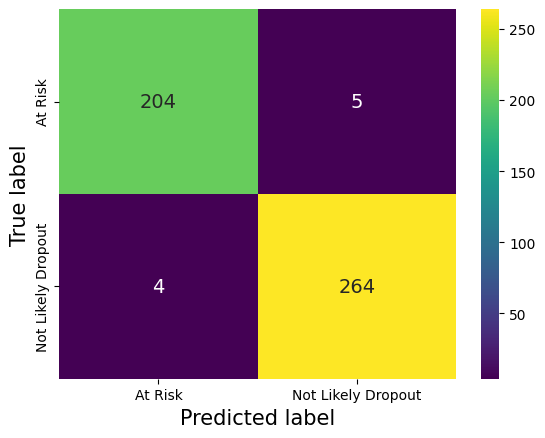

,At Risk,Not Likely Dropout
At Risk,204,5
Not Likely Dropout,4,264


In [57]:
y_pred_test = rdf_model.predict(new_test_df)
y_pred_test = le.inverse_transform(y_pred_test)
evaluating(y_pred=y_pred_test, y_true=y_true)

Decision Tree Classifier

                    precision    recall  f1-score   support

           At Risk       0.99      1.00      1.00       209
Not Likely Dropout       1.00      0.99      1.00       268

          accuracy                           1.00       477
         macro avg       1.00      1.00      1.00       477
      weighted avg       1.00      1.00      1.00       477



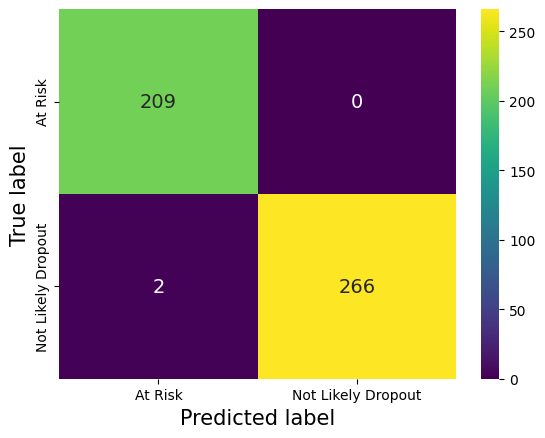

,At Risk,Not Likely Dropout
At Risk,209,0
Not Likely Dropout,2,266


In [58]:
y_pred_test = tree_model.predict(new_test_df)
y_pred_test = le.inverse_transform(y_pred_test)
evaluating(y_pred=y_pred_test, y_true=y_true)

Gradient Boosting Classifier

                    precision    recall  f1-score   support

           At Risk       1.00      1.00      1.00       209
Not Likely Dropout       1.00      1.00      1.00       268

          accuracy                           1.00       477
         macro avg       1.00      1.00      1.00       477
      weighted avg       1.00      1.00      1.00       477



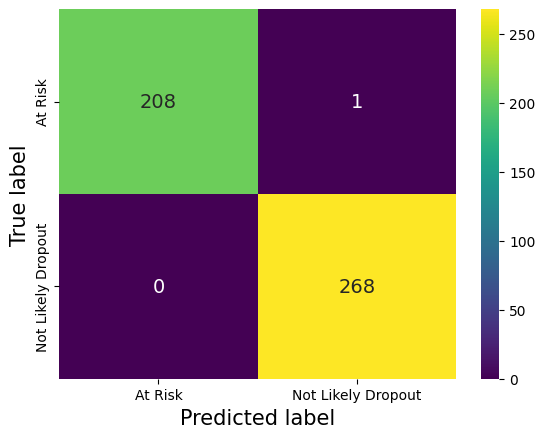

,At Risk,Not Likely Dropout
At Risk,208,1
Not Likely Dropout,0,268


In [59]:
y_pred_test = gboost_model.predict(new_test_df)
y_pred_test = le.inverse_transform(y_pred_test)
evaluating(y_pred=y_pred_test, y_true=y_true)

Logistic regression


                    precision    recall  f1-score   support

           At Risk       0.93      0.85      0.89       209
Not Likely Dropout       0.89      0.95      0.92       268

          accuracy                           0.90       477
         macro avg       0.91      0.90      0.90       477
      weighted avg       0.91      0.90      0.90       477



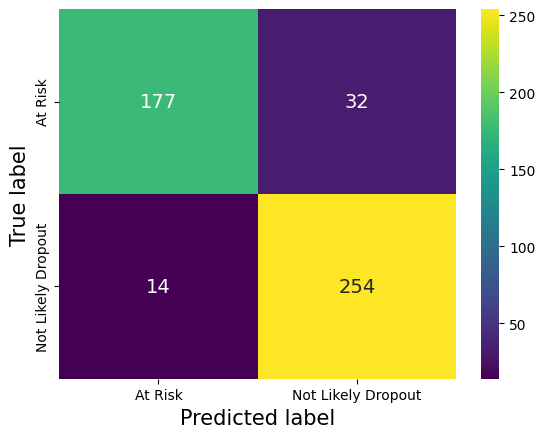

,At Risk,Not Likely Dropout
At Risk,177,32
Not Likely Dropout,14,254


In [60]:
y_pred_test = lr_model.predict(new_test_df)
y_pred_test = le.inverse_transform(y_pred_test)
evaluating(y_pred=y_pred_test, y_true=y_true)